In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quandl

In [3]:
start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2018-01-01')

In [4]:
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date=end)
goog = quandl.get('WIKI/GOOGL.11', start_date = start, end_date=end)

In [8]:
stocks = pd.concat([aapl,cisco,ibm,amzn,goog],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn','goog']

In [9]:
stocks.head()

,aapl,cisco,ibm,amzn,goog
Date,,,,,
2014-01-02,73.523423,19.451083,162.670896,397.97,558.283367
2014-01-03,71.908415,19.433400,163.644133,396.44,554.210796
2014-01-06,72.300536,19.459924,163.082988,393.63,560.389870
2014-01-07,71.783135,19.725166,166.335879,398.03,571.193219
2014-01-08,72.238063,19.710136,164.810264,401.92,572.381888


In [10]:
stocks.pct_change(1).mean()

aapl     0.000932
cisco    0.000750
ibm      0.000010
amzn     0.001247
goog     0.000726
dtype: float64

In [11]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn,goog
aapl,1.000000,0.386709,0.294813,0.339805,0.384222
cisco,0.386709,1.000000,0.429871,0.302688,0.363159
ibm,0.294813,0.429871,1.000000,0.233592,0.343487
amzn,0.339805,0.302688,0.233592,1.000000,0.574235
goog,0.384222,0.363159,0.343487,0.574235,1.000000


In [12]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn,goog
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.022211,-0.000910,0.005965,-0.003852,-0.007322
2014-01-06,0.005438,0.001364,-0.003435,-0.007113,0.011088
2014-01-07,-0.007182,0.013538,0.019750,0.011116,0.019095
2014-01-08,0.006318,-0.000762,-0.009214,0.009726,0.002079


In [13]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn,goog
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.021966,-0.000909,0.005983,-0.003845,-0.007295
2014-01-06,0.005453,0.001365,-0.003429,-0.007088,0.011149
2014-01-07,-0.007156,0.013630,0.019946,0.011178,0.019278
2014-01-08,0.006338,-0.000762,-0.009172,0.009773,0.002081


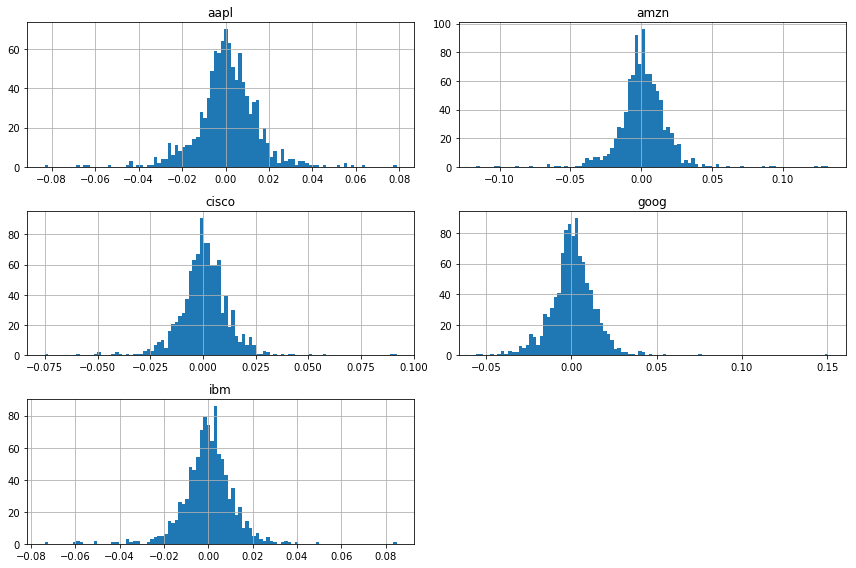

In [14]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [15]:
log_ret.mean()

aapl     0.000808
cisco    0.000674
ibm     -0.000058
amzn     0.001072
goog     0.000632
dtype: float64

In [16]:
log_ret.cov()

,aapl,cisco,ibm,amzn,goog
aapl,0.000202,0.000068,0.000049,0.000090,0.000076
cisco,0.000068,0.000151,0.000062,0.000070,0.000062
ibm,0.000049,0.000062,0.000138,0.000051,0.000056
amzn,0.000090,0.000070,0.000051,0.000344,0.000147
goog,0.000076,0.000062,0.000056,0.000147,0.000187


In [19]:
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random(5))

print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print(exp_ret)

# Expected Volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print(exp_vol)

# Sharpe Ratio 
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn', 'goog'], dtype='object')
Random Weights:
[ 0.51639863  0.57066759  0.02847423  0.17152166  0.68527698]
Rebalance
[ 0.26182041  0.28933544  0.01443678  0.08696357  0.3474438 ]
Expected Portfolio Return
0.1810645276227611
Expected Volatility
0.163849511509
Sharpe Ratio
1.10506602037


In [89]:
# Setting up portfolio to run a monte carlo simulation 

np.random.seed(101)

num_ports = 50000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    #Save Weights 
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)

    # Expected Volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [91]:
sharpe_arr.max()

1.1926969764850128

In [92]:
# Find max sharpe result
sharpe_arr.argmax()

24470

In [94]:
# Best result so we can understand allocation 
all_weights[24470,:]

array([  3.04139711e-01,   3.47826152e-01,   1.72280330e-04,
         3.30399840e-01,   1.74620161e-02])

In [95]:
# so best allocation can be plotted
max_sr_ret = ret_arr[24470]
max_sr_vol = vol_arr[24470]

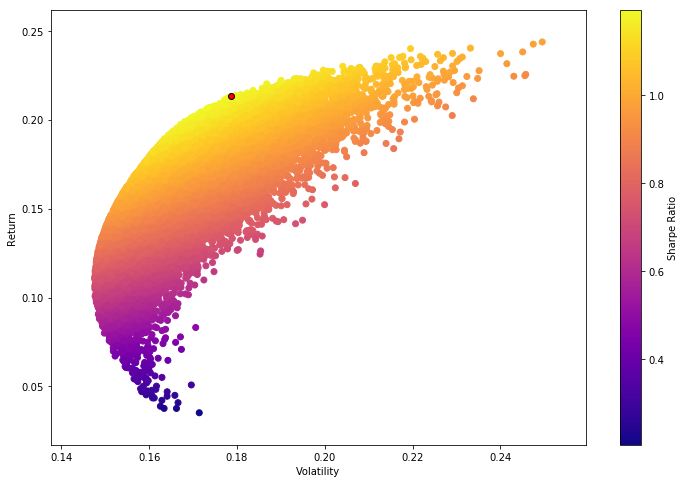

In [96]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# plot highest Sharpe ratio 
plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black')

In [97]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [98]:
from scipy.optimize import minimize

In [99]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

In [100]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 

In [101]:
def check_sum(weights):
    # return 0 if sum of weights is 1
    return np.sum(weights) - 1

In [102]:
cons = ({'type':'eq','fun':check_sum})

In [103]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

In [104]:
init_guess = [.2,.2,.2,.2,.2]

In [105]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [106]:
opt_results

     fun: -1.1950527314296588
     jac: array([  1.64598227e-04,  -6.00963831e-04,   6.16058424e-01,
         5.77196479e-04,  -2.31742859e-04])
 message: 'Optimization terminated successfully.'
    nfev: 35
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  3.28699835e-01,   3.66558613e-01,   1.21864324e-16,
         2.92728814e-01,   1.20127384e-02])

In [107]:
opt_results.x

array([  3.28699835e-01,   3.66558613e-01,   1.21864324e-16,
         2.92728814e-01,   1.20127384e-02])

In [108]:
get_ret_vol_sr(opt_results.x)

array([ 0.21021946,  0.1759081 ,  1.19505273])